In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [3]:
data = pd.read_csv('data/training.csv')

In [4]:
data.head(2)

,user,movie,rating,timestamp
0,6040,858,4,956703932
1,6040,593,5,956703954


In [5]:
data.describe()

,user,movie,rating,timestamp
count,800000.000000,800000.000000,800000.000000,8.000000e+05
mean,3403.097837,1849.257256,3.590479,9.683921e+08
std,1546.589028,1086.852485,1.120376,5.820931e+06
min,636.000000,1.000000,1.000000,9.567039e+08
25%,2035.000000,1028.000000,3.000000,9.641524e+08
50%,3507.000000,1788.000000,4.000000,9.675878e+08
75%,4695.000000,2750.000000,4.000000,9.746878e+08
max,6040.000000,3952.000000,5.000000,9.757673e+08


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 4 columns):
user         800000 non-null int64
movie        800000 non-null int64
rating       800000 non-null int64
timestamp    800000 non-null int64
dtypes: int64(4)
memory usage: 24.4 MB


In [7]:
data.user.value_counts()

1680    1849
889     1518
4169    1440
4277    1407
3618    1344
1941    1305
1150    1298
5795    1272
4344    1271
4510    1240
4227    1222
3841    1216
4508    1164
3808    1158
5367    1135
3539    1078
5831    1054
2063    1053
3224    1034
3032    1019
5643    1015
4064    1009
2909    1008
4725    1006
5954    1000
4447     982
1285     978
1181     970
1980     963
1880     955
        ... 
1256       6
755        6
1715       6
3532       6
1092       6
2775       6
1539       6
973        6
2057       5
750        5
5998       5
5291       5
1463       5
5484       5
918        5
4744       5
4610       5
4467       5
1447       5
827        5
4418       5
1547       5
988        4
1551       4
3459       4
1779       4
4273       3
3288       3
3326       2
3038       2
Name: user, Length: 5399, dtype: int64

In [8]:
data.movie.value_counts()

2858    2901
1196    2516
260     2515
1210    2456
589     2284
2028    2245
480     2232
1270    2183
2571    2172
1580    2156
593     2151
608     2144
1198    2110
110     2081
2762    2024
2396    1995
1197    1947
527     1934
1617    1929
1097    1910
2628    1902
2997    1899
1265    1882
858     1873
318     1845
2716    1834
356     1818
296     1803
1240    1770
1       1749
        ... 
1709       1
684        1
3376       1
3377       1
642        1
2742       1
3779       1
641        1
834        1
706        1
3904       1
607        1
3651       1
2308       1
579        1
1852       1
127        1
1630       1
1851       1
1118       1
827        1
3899       1
1724       1
2235       1
2584       1
1134       1
3382       1
3607       1
1558       1
1908       1
Name: movie, Length: 3662, dtype: int64

In [9]:
data.timestamp = pd.to_datetime(data.timestamp)

In [10]:
data.timestamp[2000]

Timestamp('1970-01-01 00:00:00.956731215')

In [11]:
data[data.rating == 5]

,user,movie,rating,timestamp
1,6040,593,5,1970-01-01 00:00:00.956703954
4,6040,2019,5,1970-01-01 00:00:00.956703977
7,6040,3111,5,1970-01-01 00:00:00.956704056
8,6040,213,5,1970-01-01 00:00:00.956704056
11,6040,912,5,1970-01-01 00:00:00.956704191
12,6040,919,5,1970-01-01 00:00:00.956704191
13,6040,2503,5,1970-01-01 00:00:00.956704191
14,6040,527,5,1970-01-01 00:00:00.956704219
16,6040,1252,5,1970-01-01 00:00:00.956704257
17,6040,649,5,1970-01-01 00:00:00.956704257


In [12]:
data[data.rating == 4]

,user,movie,rating,timestamp
0,6040,858,4,1970-01-01 00:00:00.956703932
2,6040,2384,4,1970-01-01 00:00:00.956703954
3,6040,1961,4,1970-01-01 00:00:00.956703977
6,6040,573,4,1970-01-01 00:00:00.956704056
9,6040,3505,4,1970-01-01 00:00:00.956704056
15,6040,318,4,1970-01-01 00:00:00.956704257
20,6040,2858,4,1970-01-01 00:00:00.956704475
21,6040,608,4,1970-01-01 00:00:00.956704475
24,6040,326,4,1970-01-01 00:00:00.956704519
27,6040,34,4,1970-01-01 00:00:00.956704584


In [13]:
data[data.rating == 3]

,user,movie,rating,timestamp
5,6040,1419,3,1970-01-01 00:00:00.956704056
22,6040,2396,3,1970-01-01 00:00:00.956704475
26,6040,17,3,1970-01-01 00:00:00.956704584
33,6040,150,3,1970-01-01 00:00:00.956704716
41,6040,265,3,1970-01-01 00:00:00.956704788
43,6040,1358,3,1970-01-01 00:00:00.956704829
44,6040,2324,3,1970-01-01 00:00:00.956704829
49,6040,1704,3,1970-01-01 00:00:00.956704887
51,6040,45,3,1970-01-01 00:00:00.956704953
59,6040,1694,3,1970-01-01 00:00:00.956705056


In [14]:
data[data.rating == 2]

,user,movie,rating,timestamp
10,6040,1734,2,1970-01-01 00:00:00.956704081
34,6040,300,2,1970-01-01 00:00:00.956704716
40,6040,1554,2,1970-01-01 00:00:00.956704788
46,6040,247,2,1970-01-01 00:00:00.956704854
47,6040,235,2,1970-01-01 00:00:00.956704854
53,6040,348,2,1970-01-01 00:00:00.956704972
77,6039,3421,2,1970-01-01 00:00:00.956705323
81,6039,1244,2,1970-01-01 00:00:00.956705351
97,6039,2671,2,1970-01-01 00:00:00.956705508
158,6039,783,2,1970-01-01 00:00:00.956706051


In [15]:
data[data.rating == 1]

,user,movie,rating,timestamp
198,6037,1882,1,1970-01-01 00:00:00.956708997
243,6036,2826,1,1970-01-01 00:00:00.956709453
246,6036,2492,1,1970-01-01 00:00:00.956709453
253,6036,3285,1,1970-01-01 00:00:00.956709526
254,6036,2694,1,1970-01-01 00:00:00.956709526
257,6036,2555,1,1970-01-01 00:00:00.956709526
282,6036,1911,1,1970-01-01 00:00:00.956709631
288,6036,2722,1,1970-01-01 00:00:00.956709631
295,6036,3113,1,1970-01-01 00:00:00.956709679
316,6036,407,1,1970-01-01 00:00:00.956709818


In [16]:
data[data.rating >3].user.value_counts()

4277    1209
1680    1108
4169     888
3032     861
3539     819
5831     748
3224     730
4448     708
3292     707
2909     691
4344     678
1285     669
5100     646
3391     634
5795     594
1835     589
3272     579
2507     574
5511     569
2304     563
4482     562
2793     559
3163     550
3841     539
5614     536
1015     535
3705     535
1941     524
3029     519
5046     511
        ... 
1256       4
4610       3
1715       3
738        3
3152       3
2669       3
827        3
1551       3
4273       3
874        3
2598       3
5991       3
2991       3
1092       3
5132       3
1447       3
3326       2
4349       2
2775       2
5998       2
4636       2
973        2
4744       2
1547       1
1779       1
3038       1
3288       1
988        1
5850       1
918        1
Name: user, Length: 5395, dtype: int64

In [17]:
data[data.rating >2].user.value_counts()

1680    1515
4277    1389
4169    1292
3618    1146
3539    1029
3032    1003
5831     991
3841     976
4344     973
3224     959
1941     949
889      943
4725     936
2909     911
3292     897
1285     875
4808     868
2304     834
4448     834
3272     832
4425     815
3391     801
1880     797
4508     796
1980     792
5795     792
3808     786
5643     778
5100     768
1181     753
        ... 
4744       5
5484       5
750        5
4418       5
1463       5
2775       5
2991       5
1256       4
2057       4
3459       4
5991       4
3152       4
5291       4
1551       4
1092       4
5761       4
738        4
973        3
827        3
4273       3
1547       3
988        3
5998       3
1779       3
3288       2
3326       2
4486       1
918        1
4467       1
3038       1
Name: user, Length: 5398, dtype: int64

In [18]:
data[data.rating >4].user.value_counts()

4277    527
3032    466
4169    425
5100    417
1680    406
4448    377
1835    367
2909    360
2124    357
3539    353
3391    351
1285    322
2507    319
5795    312
5954    301
3292    296
5511    278
2793    273
5504    270
1741    269
4028    257
4904    256
4354    250
1333    247
5614    244
1586    241
3029    235
4411    234
3834    231
1224    226
       ... 
1945      1
1431      1
4073      1
3869      1
3459      1
4184      1
4926      1
4284      1
3354      1
4547      1
3264      1
1252      1
5370      1
5828      1
5998      1
2450      1
1187      1
2111      1
4804      1
3893      1
3124      1
1779      1
5411      1
2964      1
4059      1
5155      1
4628      1
1766      1
5012      1
2524      1
Name: user, Length: 5358, dtype: int64

In [19]:
data[data.rating >4].movie.value_counts()

2858    1674
260     1532
1198    1267
858     1243
1196    1240
527     1227
318     1218
2571    1208
2028    1176
2762    1159
593     1137
608     1102
110     1039
296     1004
1197     997
50       943
2997     876
1210     875
1617     842
2396     831
912      826
589      819
1221     793
1193     788
541      780
356      777
1214     742
1240     707
1213     697
919      692
        ... 
1811       1
2255       1
2835       1
981        1
853        1
2386       1
3216       1
3923       1
1553       1
1746       1
3664       1
1105       1
2896       1
209        1
2128       1
3665       1
974        1
3025       1
2897       1
3603       1
336        1
2257       1
2129       1
1871       1
2766       1
2638       1
463        1
1998       1
1486       1
2047       1
Name: movie, Length: 3164, dtype: int64

In [20]:
data[data.rating >3].movie.value_counts()

2858    2422
260     2203
1196    2111
2028    1906
1198    1893
593     1885
2571    1823
1210    1803
2762    1788
608     1775
589     1773
527     1736
318     1698
110     1684
858     1670
1197    1616
1270    1602
1617    1584
2396    1572
2997    1505
296     1479
480     1433
1240    1422
1       1395
1580    1384
1214    1380
356     1377
1097    1370
1265    1368
457     1352
        ... 
1886       1
470        1
2887       1
2544       1
815        1
3164       1
3126       1
3292       1
1561       1
1632       1
3818       1
734        1
3940       1
3172       1
792        1
749        1
3906       1
2251       1
2955       1
3353       1
2543       1
2825       1
139        1
3084       1
2783       1
712        1
200        1
793        1
1890       1
1494       1
Name: movie, Length: 3469, dtype: int64

In [21]:
data[data.rating >2].movie.value_counts()

2858    2724
260     2446
1196    2428
1210    2312
589     2165
2028    2165
593     2085
1270    2082
1198    2074
2571    2032
608     2019
480     2015
110     1971
2762    1961
1580    1952
527     1893
1197    1889
1617    1864
2396    1858
858     1820
318     1815
1097    1765
1265    1756
2997    1754
2716    1724
1240    1703
296     1684
1       1682
356     1673
1214    1620
        ... 
572        1
2909       1
3530       1
712        1
120        1
1555       1
1102       1
3522       1
2631       1
310        1
1915       1
1471       1
1470       1
3380       1
1842       1
1071       1
1830       1
821        1
3607       1
2486       1
3472       1
1843       1
3085       1
1145       1
1659       1
1891       1
868        1
789        1
3890       1
889        1
Name: movie, Length: 3570, dtype: int64

In [22]:
data[data.rating >1].movie.value_counts()

2858    2837
260     2501
1196    2499
1210    2426
589     2250
2028    2221
480     2179
1270    2165
2571    2140
593     2120
1580    2114
1198    2106
608     2095
110     2049
2762    2009
2396    1962
1197    1927
527     1918
1617    1913
1097    1880
858     1856
1265    1855
2997    1843
318     1837
2716    1813
2628    1782
356     1774
296     1763
1240    1754
1       1733
        ... 
2631       1
975        1
2825       1
796        1
651        1
3656       1
1915       1
1720       1
887        1
3530       1
3151       1
2254       1
1830       1
2895       1
792        1
3522       1
572        1
3277       1
3407       1
666        1
591        1
601        1
1471       1
3085       1
3337       1
1470       1
3413       1
3353       1
545        1
2235       1
Name: movie, Length: 3621, dtype: int64

In [23]:
data[data.rating >1].movie.value_counts()

2858    2837
260     2501
1196    2499
1210    2426
589     2250
2028    2221
480     2179
1270    2165
2571    2140
593     2120
1580    2114
1198    2106
608     2095
110     2049
2762    2009
2396    1962
1197    1927
527     1918
1617    1913
1097    1880
858     1856
1265    1855
2997    1843
318     1837
2716    1813
2628    1782
356     1774
296     1763
1240    1754
1       1733
        ... 
2631       1
975        1
2825       1
796        1
651        1
3656       1
1915       1
1720       1
887        1
3530       1
3151       1
2254       1
1830       1
2895       1
792        1
3522       1
572        1
3277       1
3407       1
666        1
591        1
601        1
1471       1
3085       1
3337       1
1470       1
3413       1
3353       1
545        1
2235       1
Name: movie, Length: 3621, dtype: int64

In [24]:
data[(data.rating >1) & data.movie <4000].movie.value_counts()

2858    2901
1196    2516
260     2515
1210    2456
589     2284
2028    2245
480     2232
1270    2183
2571    2172
1580    2156
593     2151
608     2144
1198    2110
110     2081
2762    2024
2396    1995
1197    1947
527     1934
1617    1929
1097    1910
2628    1902
2997    1899
1265    1882
858     1873
318     1845
2716    1834
356     1818
296     1803
1240    1770
1       1749
        ... 
1709       1
684        1
3376       1
3377       1
642        1
2742       1
3779       1
641        1
834        1
706        1
3904       1
607        1
3651       1
2308       1
579        1
1852       1
127        1
1630       1
1851       1
1118       1
827        1
3899       1
1724       1
2235       1
2584       1
1134       1
3382       1
3607       1
1558       1
1908       1
Name: movie, Length: 3662, dtype: int64

In [25]:
data[(data.rating >1) & data.movie <3000].movie.value_counts()

2858    2901
1196    2516
260     2515
1210    2456
589     2284
2028    2245
480     2232
1270    2183
2571    2172
1580    2156
593     2151
608     2144
1198    2110
110     2081
2762    2024
2396    1995
1197    1947
527     1934
1617    1929
1097    1910
2628    1902
2997    1899
1265    1882
858     1873
318     1845
2716    1834
356     1818
296     1803
1240    1770
1       1749
        ... 
1709       1
684        1
3376       1
3377       1
642        1
2742       1
3779       1
641        1
834        1
706        1
3904       1
607        1
3651       1
2308       1
579        1
1852       1
127        1
1630       1
1851       1
1118       1
827        1
3899       1
1724       1
2235       1
2584       1
1134       1
3382       1
3607       1
1558       1
1908       1
Name: movie, Length: 3662, dtype: int64

(array([ 45335.,  84610., 207148., 278151., 184756.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <a list of 5 Patch objects>)

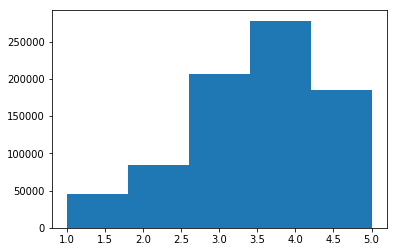

In [26]:
plt.hist(data.rating, bins=5)

(array([ 36543.,  68348., 166286., 224314., 156049.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <a list of 5 Patch objects>)

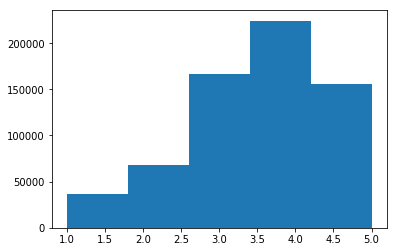

In [27]:
plt.hist(data[data.movie <3000].rating, bins=5)

(array([ 22295.,  41835., 105529., 151633., 114298.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <a list of 5 Patch objects>)

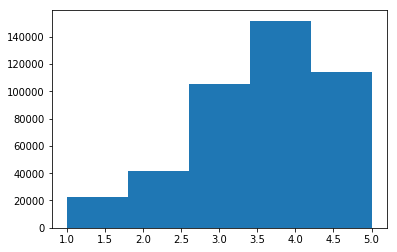

In [28]:
plt.hist(data[data.movie <2000].rating, bins=5)